In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# From a list of tuple 2D plot a simple graph
def linear_graph(tuples_list, x_label, y_label, title):
    # Extract x and y values from the list of tuples
    x_values, y_values = zip(*tuples_list)
    # Create a line plot
    plt.plot(x_values, y_values, marker='o', linestyle='-')
    # Add labels and a title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    # Show the plot
    plt.show()
    
# Plot moving average from a list of tuples
def moving_average(tuples_list, x_axis_name='Time', y_axsis_name='Reward', title='Moving average plot', window_size=3):
    # Check of good inputs
    if not isinstance(x_axis_name, str) or not isinstance(y_axsis_name, str) or not isinstance(title, str) :
        raise ValueError("Input x_name, y_name, title must be a string")
    if not isinstance(tuples_list, list):
        raise ValueError("Input must be a list")
    for item in tuples_list:
        if not isinstance(item, tuple) or len(item) != 2:
            raise ValueError("Each element in the list must be a 2D tuple (tuple with two elements)")
    
    # Extract x and y values into separate lists
    x_values, y_values = zip(*tuples_list)

    # Calculate the moving average using numpy
    moving_avg = np.convolve(y_values, np.ones(window_size)/window_size, mode='valid')

    # Create a new list of x values for the moving average
    x_avg = x_values[(window_size-1)//2 : -(window_size-1)//2]

    # Plot the original data points
    plt.scatter(x_values, y_values, label='Original Data', marker='o')

    # Plot the moving average
    plt.plot(x_avg, moving_avg, label=f'Moving Average (Window Size {window_size})', color='red')

    # Add labels and legend
    plt.xlabel(x_axis_name)
    plt.ylabel(y_axsis_name)
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.title(title)
    plt.show()
    
def tuple_list_from_csv(filename):
    """plot moving average and std of a pandas dataframe
    Args:
        filename (_type_): _description_
    """
    
    df = pd.read_csv(filename)
    
    f_name = df.columns[0]
    s_name = df.columns[1]
    
    # Set the window size for the moving average and std calculation
    window_size = 200  # You can adjust this value

    # Calculate the moving average using Pandas rolling function
    df['MovingAverage'] = df[s_name].rolling(window=window_size, center=True).mean()

    # Calculate the standard deviation using Pandas rolling function
    df['StdDeviation'] = df[s_name].rolling(window=window_size,center=True).std()

    # Create a plot using Seaborn and Matplotlib
    plt.figure()
    sns.scatterplot(x=f_name, y=s_name, data=df, label='Raw Data', color='blue',alpha=0.1)
    sns.lineplot(x=f_name, y='MovingAverage', data=df, label='Moving Average', color='red')

    # Fill the area between MovingAverage - StdDeviation and MovingAverage + StdDeviation with a shaded region
    plt.fill_between(df[f_name], df['MovingAverage'] - df['StdDeviation'], df['MovingAverage'] + df['StdDeviation'], alpha=0.4, color='green', label='Std Deviation')

    # Customize the plot
    plt.xlabel('Episode')
    plt.ylabel(s_name)
    plt.title(f'{s_name}')
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show()
    # Show the plot
    plt.show()

    
def compare_with_random(filename, filename2):
    """plot moving average and std of a pandas dataframe
    Args:
        filename (_type_): _description_
    """
    
    df = pd.read_csv(filename)
    df2 = pd.read_csv(filename2)
    f_name = df.columns[0]
    s_name = df.columns[1]
    f_name2 = df2.columns[0]
    s_name2 = df2.columns[1]
    
    # Set the window size for the moving average and std calculation
    window_size = 200  # You can adjust this value

    # Calculate the moving average using Pandas rolling function
    df['MovingAverage'] = df[s_name].rolling(window=window_size, center=True).mean()

    # Calculate the standard deviation using Pandas rolling function
    df['StdDeviation'] = df[s_name].rolling(window=window_size,center=True).std()

    
    # Calculate the moving average using Pandas rolling function
    df2['MovingAverage'] = df2[s_name2].rolling(window=window_size, center=True).mean()

    # Calculate the standard deviation using Pandas rolling function
    df2['StdDeviation'] = df2[s_name2].rolling(window=window_size,center=True).std()
    
    print(df2)
    # Create a plot using Seaborn and Matplotlib
    plt.figure()
    sns.lineplot(x=f_name, y='MovingAverage', data=df, label='Moving Average Model', color='red')
    # Fill the area between MovingAverage - StdDeviation and MovingAverage + StdDeviation with a shaded region
    plt.fill_between(df[f_name], df['MovingAverage'] - df['StdDeviation'], df['MovingAverage'] + df['StdDeviation'], alpha=0.4, color='green', label='Std Deviation Model')

    sns.lineplot(x=f_name2, y='MovingAverage', data=df2, label='Moving Average Random', color='black')
    # Fill the area between MovingAverage - StdDeviation and MovingAverage + StdDeviation with a shaded region
    plt.fill_between(df2[f_name2], df2['MovingAverage'] - df2['StdDeviation'], df2['MovingAverage'] + df2['StdDeviation'], alpha=0.4, color='blue', label='Std Deviation Random')
    # Customize the plot
    plt.xlabel('Episode')
    plt.ylabel(s_name)
    plt.title(f'{s_name}')
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show()
    # Show the plot
    plt.show()

In [2]:
filename = '../results\FF_Qlearning\logs\r2_regresProblem_99_20'
filename_bp = '../results\FF_Qlearning\logs\r2_regresProblem_bp_99_20'


In [3]:
df_bp = pd.read_csv(filename_bp)
df = pd.read_csv(filename)

OSError: [Errno 22] Invalid argument: '../results\\FF_Qlearning\\logs\r2_regresProblem_bp_99_20'

In [ ]:
df

In [4]:
filename = '../results\FF_Qlearning/logs/r2_regresProblem_99_20.csv'
filename_bp = '../results\FF_Qlearning/logs/r2_regresProblem_bp_99_20.csv'


In [5]:
df_bp = pd.read_csv(filename_bp)
df = pd.read_csv(filename)

In [6]:

df

,epoch,r2score,r2score2,r2score3,r2score4,r2score5,r2score6,r2score7,r2score8,r2score9,r2score10,r2score11,r2score12,r2score13,r2score14,r2score15,r2score16,r2score17,r2score18,r2score19
0,1,-0.715260,-0.585168,-0.569520,-0.571343,-0.670391,-0.589615,-0.590653,-0.630758,-0.584298,-0.558959,-0.634570,-0.589995,-0.568535,-0.645464,-0.588946,-0.606042,-0.644483,-0.701656,-0.576855
1,2,-0.590362,-0.676950,-0.618416,-0.638288,-0.647622,-0.627757,-0.672569,-0.643804,-0.595847,-0.635862,-0.625562,-0.546486,-0.673591,-0.632055,-0.627083,-0.653648,-0.612674,-0.600040,-0.609622
2,3,-0.642731,-0.494546,-0.610126,-0.653635,-0.663061,-0.665252,-0.601203,-0.567720,-0.581917,-0.660396,-0.585876,-0.625333,-0.573831,-0.565794,-0.661535,-0.640215,-0.586591,-0.580720,-0.561559
3,4,-0.684108,-0.612121,-0.594096,-0.545348,-0.624056,-0.576516,-0.663019,-0.583449,-0.570446,-0.623264,-0.532453,-0.516786,-0.491321,-0.630433,-0.600583,-0.592710,-0.572943,-0.600028,-0.623368
4,5,-0.589626,-0.585313,-0.603674,-0.538928,-0.515874,-0.539468,-0.566503,-0.562422,-0.527752,-0.608793,-0.519715,-0.606184,-0.611767,-0.688323,-0.476179,-0.546193,-0.681234,-0.559293,-0.580840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,95,0.183635,0.135041,0.221395,0.189481,0.206782,0.250661,0.235285,0.201160,0.241798,0.224969,0.240495,0.194461,0.230146,0.226544,0.210240,0.190398,0.192261,0.205349,0.143738
95,96,0.253040,0.244008,0.260384,0.195565,0.252756,0.184484,0.202115,0.197175,0.224007,0.151936,0.250025,0.158780,0.234587,0.200066,0.239000,0.221032,0.253348,0.234469,0.134152
96,97,0.195290,0.165026,0.260116,0.211180,0.227375,0.229375,0.232220,0.227767,0.289994,0.191509,0.130569,0.150817,0.184209,0.180067,0.248577,0.217614,0.201133,0.229338,0.209432
97,98,0.190368,0.244278,0.169896,0.223123,0.195070,0.205826,0.227510,0.197775,0.178822,0.263432,0.188382,0.216171,0.230885,0.231447,0.203266,0.221724,0.190602,0.220271,0.180070


In [7]:
# Calculate mean and standard deviation for r2score columns
r2score_columns = df.columns[1:]
df['r2score_mean'] = df[r2score_columns].mean(axis=1)
df['r2score_std'] = df[r2score_columns].std(axis=1)

In [8]:
df

,epoch,r2score,r2score2,r2score3,r2score4,r2score5,r2score6,r2score7,r2score8,r2score9,...,r2score12,r2score13,r2score14,r2score15,r2score16,r2score17,r2score18,r2score19,r2score_mean,r2score_std
0,1,-0.715260,-0.585168,-0.569520,-0.571343,-0.670391,-0.589615,-0.590653,-0.630758,-0.584298,...,-0.589995,-0.568535,-0.645464,-0.588946,-0.606042,-0.644483,-0.701656,-0.576855,-0.611711,0.045968
1,2,-0.590362,-0.676950,-0.618416,-0.638288,-0.647622,-0.627757,-0.672569,-0.643804,-0.595847,...,-0.546486,-0.673591,-0.632055,-0.627083,-0.653648,-0.612674,-0.600040,-0.609622,-0.627802,0.032046
2,3,-0.642731,-0.494546,-0.610126,-0.653635,-0.663061,-0.665252,-0.601203,-0.567720,-0.581917,...,-0.625333,-0.573831,-0.565794,-0.661535,-0.640215,-0.586591,-0.580720,-0.561559,-0.606423,0.046262
3,4,-0.684108,-0.612121,-0.594096,-0.545348,-0.624056,-0.576516,-0.663019,-0.583449,-0.570446,...,-0.516786,-0.491321,-0.630433,-0.600583,-0.592710,-0.572943,-0.600028,-0.623368,-0.591424,0.047837
4,5,-0.589626,-0.585313,-0.603674,-0.538928,-0.515874,-0.539468,-0.566503,-0.562422,-0.527752,...,-0.606184,-0.611767,-0.688323,-0.476179,-0.546193,-0.681234,-0.559293,-0.580840,-0.574109,0.053321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,95,0.183635,0.135041,0.221395,0.189481,0.206782,0.250661,0.235285,0.201160,0.241798,...,0.194461,0.230146,0.226544,0.210240,0.190398,0.192261,0.205349,0.143738,0.206518,0.030924
95,96,0.253040,0.244008,0.260384,0.195565,0.252756,0.184484,0.202115,0.197175,0.224007,...,0.158780,0.234587,0.200066,0.239000,0.221032,0.253348,0.234469,0.134152,0.215312,0.037724
96,97,0.195290,0.165026,0.260116,0.211180,0.227375,0.229375,0.232220,0.227767,0.289994,...,0.150817,0.184209,0.180067,0.248577,0.217614,0.201133,0.229338,0.209432,0.209558,0.038259
97,98,0.190368,0.244278,0.169896,0.223123,0.195070,0.205826,0.227510,0.197775,0.178822,...,0.216171,0.230885,0.231447,0.203266,0.221724,0.190602,0.220271,0.180070,0.209417,0.024517


In [9]:
df.drop(r2score_columns, axis=1, inplace=True)

In [10]:
df

,epoch,r2score_mean,r2score_std
0,1,-0.611711,0.045968
1,2,-0.627802,0.032046
2,3,-0.606423,0.046262
3,4,-0.591424,0.047837
4,5,-0.574109,0.053321
...,...,...,...
94,95,0.206518,0.030924
95,96,0.215312,0.037724
96,97,0.209558,0.038259
97,98,0.209417,0.024517


In [11]:
df_bp

,epoch,r2score,r2score2,r2score3,r2score4,r2score5,r2score6,r2score7,r2score8,r2score9,r2score10,r2score11,r2score12,r2score13,r2score14,r2score15,r2score16,r2score17,r2score18,r2score19
0,0,-0.618664,-0.742047,-0.452664,-0.530935,-0.597335,-0.610297,-0.499043,-0.567541,-0.609266,-0.613034,-0.619629,-0.678969,-0.554743,-0.673523,-0.719775,-0.556978,-0.654027,-0.593518,-0.582250
1,1,-0.611961,-0.726982,-0.427775,-0.520963,-0.589007,-0.601368,-0.476870,-0.563559,-0.602453,-0.598686,-0.616216,-0.674190,-0.530023,-0.653651,-0.703348,-0.542505,-0.646525,-0.578431,-0.577240
2,2,-0.606671,-0.712826,-0.401599,-0.511277,-0.580137,-0.592575,-0.454182,-0.559839,-0.597358,-0.581703,-0.613572,-0.670090,-0.505000,-0.635274,-0.689012,-0.526761,-0.640486,-0.564694,-0.571404
3,3,-0.602753,-0.699309,-0.374029,-0.501611,-0.570368,-0.583641,-0.430599,-0.556112,-0.593365,-0.561832,-0.611436,-0.666422,-0.479390,-0.619300,-0.676788,-0.509566,-0.635480,-0.551864,-0.564815
4,4,-0.599755,-0.686040,-0.344798,-0.491598,-0.559068,-0.574493,-0.405546,-0.552182,-0.589917,-0.538939,-0.609541,-0.662908,-0.452584,-0.608919,-0.666377,-0.490773,-0.631069,-0.539438,-0.557472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,0.798772,0.884724,0.840939,0.874651,0.841579,0.873119,0.828380,0.882312,0.856086,0.859712,-0.418072,0.902156,0.764026,0.827565,0.767535,0.854226,0.872408,0.781958,0.909981
96,96,0.801956,0.887091,0.843009,0.876426,0.843345,0.876053,0.830942,0.884974,0.858087,0.861373,-0.416452,0.904158,0.765865,0.830901,0.769917,0.856689,0.875671,0.783208,0.911265
97,97,0.805420,0.889486,0.845108,0.878267,0.845064,0.878960,0.833483,0.887314,0.860018,0.863009,-0.414836,0.906248,0.767683,0.834175,0.772291,0.859195,0.878927,0.784425,0.912606
98,98,0.808908,0.891919,0.847238,0.880170,0.846758,0.881827,0.835990,0.889510,0.861913,0.864634,-0.413225,0.908287,0.769471,0.837337,0.774642,0.861611,0.882124,0.785640,0.913973


In [12]:
df_bp.drop('r2score11')

KeyError: "['r2score11'] not found in axis"

In [13]:
df_bp.drop(columns=['r2score11'])

,epoch,r2score,r2score2,r2score3,r2score4,r2score5,r2score6,r2score7,r2score8,r2score9,r2score10,r2score12,r2score13,r2score14,r2score15,r2score16,r2score17,r2score18,r2score19
0,0,-0.618664,-0.742047,-0.452664,-0.530935,-0.597335,-0.610297,-0.499043,-0.567541,-0.609266,-0.613034,-0.678969,-0.554743,-0.673523,-0.719775,-0.556978,-0.654027,-0.593518,-0.582250
1,1,-0.611961,-0.726982,-0.427775,-0.520963,-0.589007,-0.601368,-0.476870,-0.563559,-0.602453,-0.598686,-0.674190,-0.530023,-0.653651,-0.703348,-0.542505,-0.646525,-0.578431,-0.577240
2,2,-0.606671,-0.712826,-0.401599,-0.511277,-0.580137,-0.592575,-0.454182,-0.559839,-0.597358,-0.581703,-0.670090,-0.505000,-0.635274,-0.689012,-0.526761,-0.640486,-0.564694,-0.571404
3,3,-0.602753,-0.699309,-0.374029,-0.501611,-0.570368,-0.583641,-0.430599,-0.556112,-0.593365,-0.561832,-0.666422,-0.479390,-0.619300,-0.676788,-0.509566,-0.635480,-0.551864,-0.564815
4,4,-0.599755,-0.686040,-0.344798,-0.491598,-0.559068,-0.574493,-0.405546,-0.552182,-0.589917,-0.538939,-0.662908,-0.452584,-0.608919,-0.666377,-0.490773,-0.631069,-0.539438,-0.557472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,0.798772,0.884724,0.840939,0.874651,0.841579,0.873119,0.828380,0.882312,0.856086,0.859712,0.902156,0.764026,0.827565,0.767535,0.854226,0.872408,0.781958,0.909981
96,96,0.801956,0.887091,0.843009,0.876426,0.843345,0.876053,0.830942,0.884974,0.858087,0.861373,0.904158,0.765865,0.830901,0.769917,0.856689,0.875671,0.783208,0.911265
97,97,0.805420,0.889486,0.845108,0.878267,0.845064,0.878960,0.833483,0.887314,0.860018,0.863009,0.906248,0.767683,0.834175,0.772291,0.859195,0.878927,0.784425,0.912606
98,98,0.808908,0.891919,0.847238,0.880170,0.846758,0.881827,0.835990,0.889510,0.861913,0.864634,0.908287,0.769471,0.837337,0.774642,0.861611,0.882124,0.785640,0.913973


In [14]:
df_bp.drop(columns=['r2score11'], inplace=True)

In [15]:
# Calculate mean and standard deviation for r2score columns
r2score_columns = df_bp.columns[1:]
df_bp['r2score_mean'] = df_bp[r2score_columns].mean(axis=1)
df_bp['r2score_std'] = df_bp[r2score_columns].std(axis=1)

In [16]:
df_bp.drop(r2score_columns, axis=1, inplace=True)

In [17]:
df_bp

,epoch,r2score_mean,r2score_std
0,0,-0.603034,0.073411
1,1,-0.590308,0.075739
2,2,-0.577827,0.079335
3,3,-0.565402,0.084211
4,4,-0.552882,0.090464
...,...,...,...
95,95,0.845563,0.043775
96,96,0.847829,0.043763
97,97,0.850093,0.043749
98,98,0.852331,0.043741


In [18]:
df

,epoch,r2score_mean,r2score_std
0,1,-0.611711,0.045968
1,2,-0.627802,0.032046
2,3,-0.606423,0.046262
3,4,-0.591424,0.047837
4,5,-0.574109,0.053321
...,...,...,...
94,95,0.206518,0.030924
95,96,0.215312,0.037724
96,97,0.209558,0.038259
97,98,0.209417,0.024517


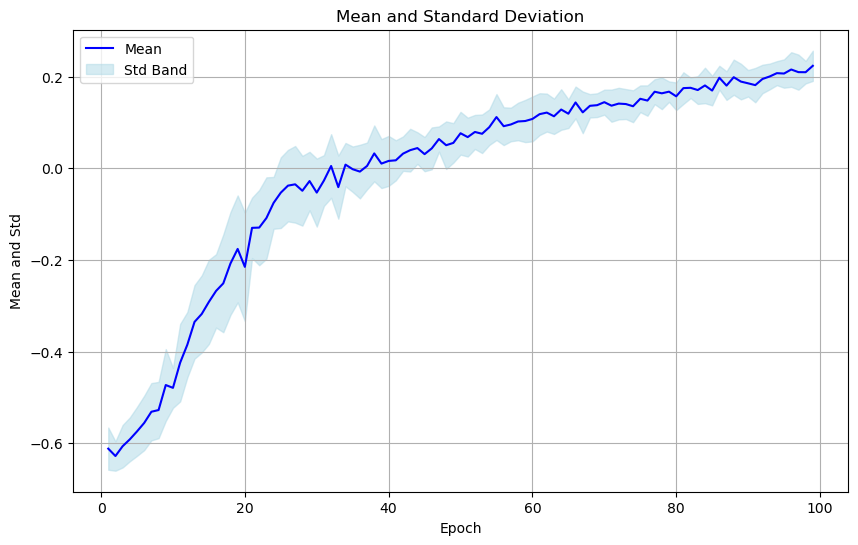

In [19]:
# Plot the mean and std as a band around the mean
plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['r2score_mean'], label='Mean', color='blue')
plt.fill_between(df['epoch'], df['r2score_mean'] - df['r2score_std'], df['r2score_mean'] + df['r2score_std'], color='lightblue', alpha=0.5, label='Std Band')
plt.xlabel('Epoch')
plt.ylabel('Mean and Std')
plt.title('Mean and Standard Deviation')
plt.legend()
plt.grid(True)
plt.show()

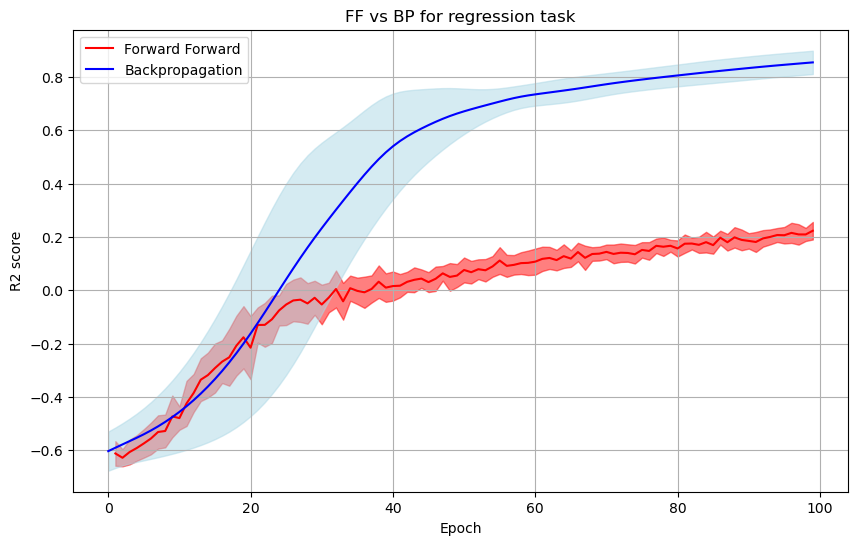

In [20]:
# Plot the mean and std as a band around the mean
plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['r2score_mean'], label='Forward Forward', color='red')
plt.fill_between(df['epoch'], df['r2score_mean'] - df['r2score_std'], df['r2score_mean'] + df['r2score_std'], color='red', alpha=0.5)
plt.plot(df_bp['epoch'], df_bp['r2score_mean'], label='Backpropagation', color='blue')
plt.fill_between(df_bp['epoch'], df_bp['r2score_mean'] - df_bp['r2score_std'], df_bp['r2score_mean'] + df_bp['r2score_std'], color='lightblue', alpha=0.5)
plt.xlabel('Epoch')
plt.ylabel('R2 score')
plt.title('FF vs BP for regression task')
plt.legend()
plt.grid(True)
plt.show()

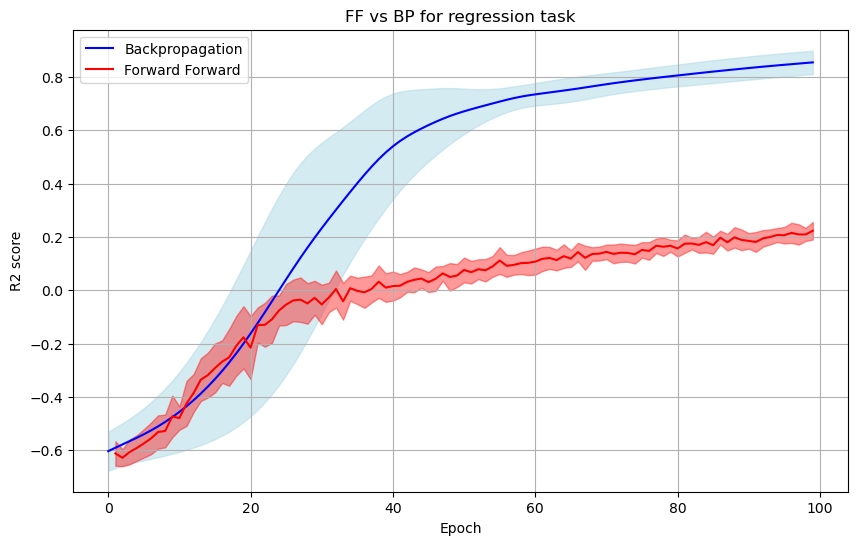

In [21]:
# Plot the mean and std as a band around the mean
plt.figure(figsize=(10, 6))
plt.plot(df_bp['epoch'], df_bp['r2score_mean'], label='Backpropagation', color='blue')
plt.fill_between(df_bp['epoch'], df_bp['r2score_mean'] - df_bp['r2score_std'], df_bp['r2score_mean'] + df_bp['r2score_std'], color='lightblue', alpha=0.5)
plt.plot(df['epoch'], df['r2score_mean'], label='Forward Forward', color='red')
plt.fill_between(df['epoch'], df['r2score_mean'] - df['r2score_std'], df['r2score_mean'] + df['r2score_std'], color='red', alpha=0.4)
plt.xlabel('Epoch')
plt.ylabel('R2 score')
plt.title('FF vs BP for regression task')
plt.legend()
plt.grid(True)
plt.show()

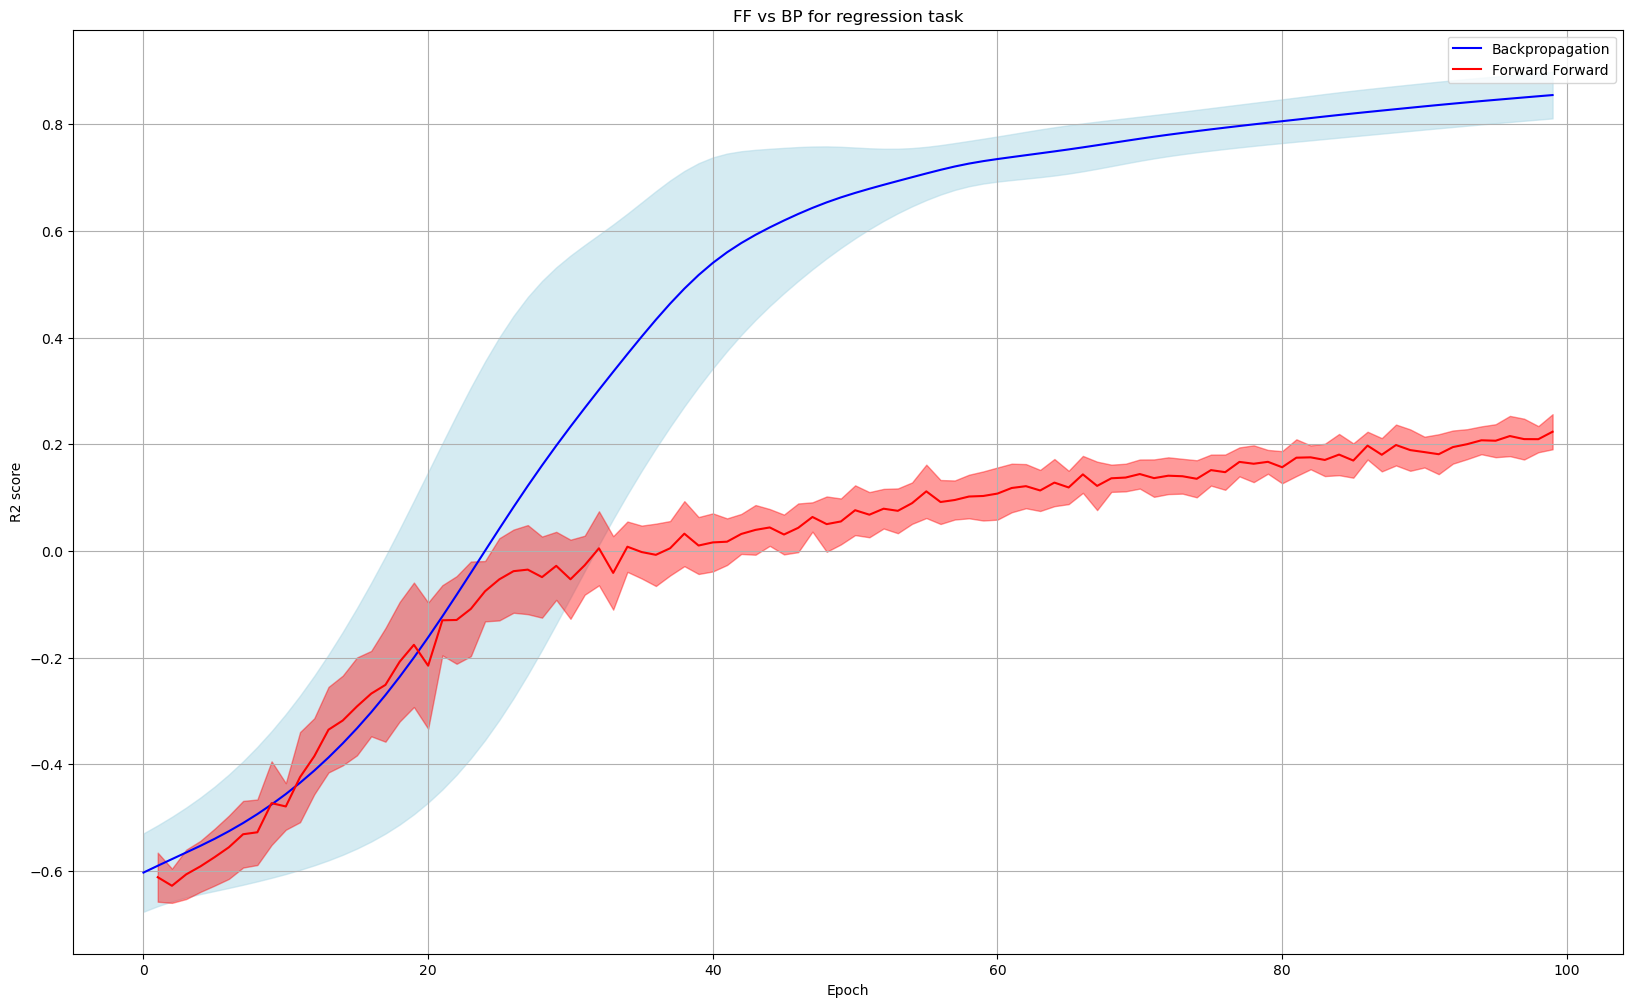

In [22]:
# Plot the mean and std as a band around the mean
plt.figure(figsize=(20, 12))
plt.plot(df_bp['epoch'], df_bp['r2score_mean'], label='Backpropagation', color='blue')
plt.fill_between(df_bp['epoch'], df_bp['r2score_mean'] - df_bp['r2score_std'], df_bp['r2score_mean'] + df_bp['r2score_std'], color='lightblue', alpha=0.5)
plt.plot(df['epoch'], df['r2score_mean'], label='Forward Forward', color='red')
plt.fill_between(df['epoch'], df['r2score_mean'] - df['r2score_std'], df['r2score_mean'] + df['r2score_std'], color='red', alpha=0.4)
plt.xlabel('Epoch')
plt.ylabel('R2 score')
plt.title('FF vs BP for regression task')
plt.legend()
plt.grid(True)
plt.show()

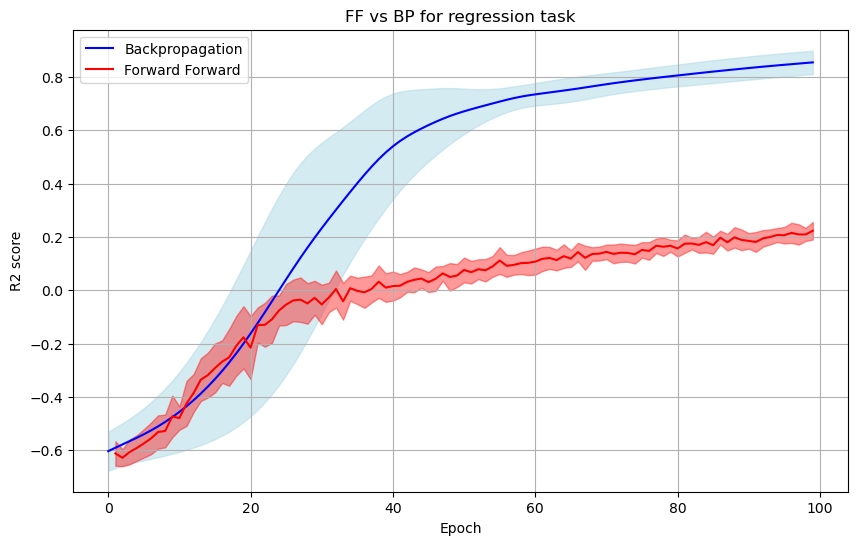

In [23]:
# Plot the mean and std as a band around the mean
plt.figure(figsize=(10, 6))
plt.plot(df_bp['epoch'], df_bp['r2score_mean'], label='Backpropagation', color='blue')
plt.fill_between(df_bp['epoch'], df_bp['r2score_mean'] - df_bp['r2score_std'], df_bp['r2score_mean'] + df_bp['r2score_std'], color='lightblue', alpha=0.5)
plt.plot(df['epoch'], df['r2score_mean'], label='Forward Forward', color='red')
plt.fill_between(df['epoch'], df['r2score_mean'] - df['r2score_std'], df['r2score_mean'] + df['r2score_std'], color='red', alpha=0.4)
plt.xlabel('Epoch')
plt.ylabel('R2 score')
plt.title('FF vs BP for regression task')
plt.legend()
plt.grid(True)
plt.show()

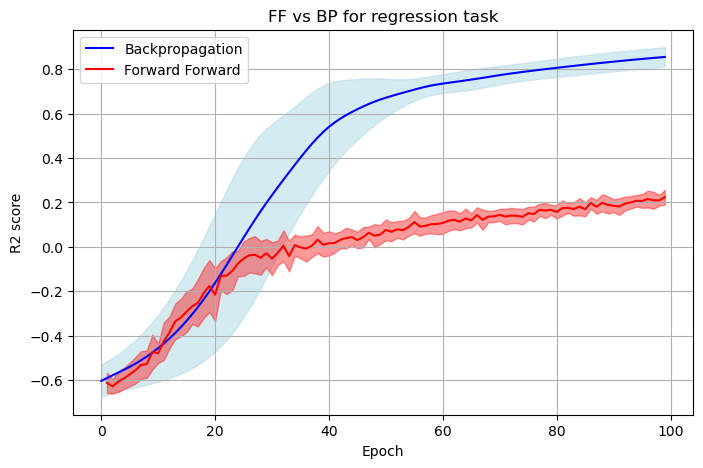

In [24]:
# Plot the mean and std as a band around the mean
plt.figure(figsize=(8, 5))
plt.plot(df_bp['epoch'], df_bp['r2score_mean'], label='Backpropagation', color='blue')
plt.fill_between(df_bp['epoch'], df_bp['r2score_mean'] - df_bp['r2score_std'], df_bp['r2score_mean'] + df_bp['r2score_std'], color='lightblue', alpha=0.5)
plt.plot(df['epoch'], df['r2score_mean'], label='Forward Forward', color='red')
plt.fill_between(df['epoch'], df['r2score_mean'] - df['r2score_std'], df['r2score_mean'] + df['r2score_std'], color='red', alpha=0.4)
plt.xlabel('Epoch')
plt.ylabel('R2 score')
plt.title('FF vs BP for regression task')
plt.legend()
plt.grid(True)
plt.show()